## Biểu diễn từ bằng vector - Word embedding

In [ ]:
'''
["The cat sat on the mat "]
["The","cat","sat","on","the","mat"] - word level
["T","h","e"," ","c","a","t"," "s","a","t","o","n","t","h","e","m","a","t"] - Character level
["The cat","sat","on","the mat"] 
...............

'''

In [7]:
import numpy as np 
samples = ['The cat sat on the mat']


### 1. One hot encoding 

<pre> 
Vocalbulary =  ["a","an","apple",.....,"cat",...,"the",....]
                                         |
                 1    2      3    .......50........102 .....
                                         |
--> "cat" =    [ 0,   0,     0, ........,1,.......0 ...0...]

</pre>


In [9]:
## Tự xây dựng token 
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1 
max_length = 10
results = np.zeros(shape=(len(samples),
                    max_length,
                    max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j,word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i,j,index]= 1 

In [10]:
results

array([[[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]]])

In [11]:
token_index

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat': 6}

In [12]:
# Sử dụng token có sẵn bằng thư viện 
from keras.preprocessing.text import Tokenizer 
samples = ['The cat sat on the mat']
tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(samples)


In [14]:
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples,)
word_index = tokenizer.word_index 


In [21]:
tokenizer.word_index

{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5}

In [18]:
one_hot_results

array([[0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

Character Level 


In [22]:
import string 
samples = ['The cat sat on the mat']

character= string.printable 
token_index = dict(zip(range(1,len(character)+ 1 ),character))

max_length = 50 
results = np.zeros((len(samples),max_length,max(token_index.keys())+1))
for i,sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i,j,index] = 1


In [23]:
results

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

<pre>
Hiểu đơn giản là mã hóa nhị phân
- Thưa thớt 
- High-Dimension 
</pre>

### 2. Count-based embedding 

<pre>
TF-IDF Transform 
* TF(Term Frequence): Tần số xuất hiện của một từ trong văn bản 
* IDF(Inverse Doccument Frequency) : Nghịch đảo tần suất của từ đó trong tất cả văn bản 

Hiểu đơn giản trong một văn bản các từ :
 - Xuất hiện nhiều như ["a","an","the"] thường ko có nhiều í nghĩa 
 - Xuất hiện ít hơn lại là trọng tâm của văn bản ...có nhiều ý nghĩa hơn 
</pre>

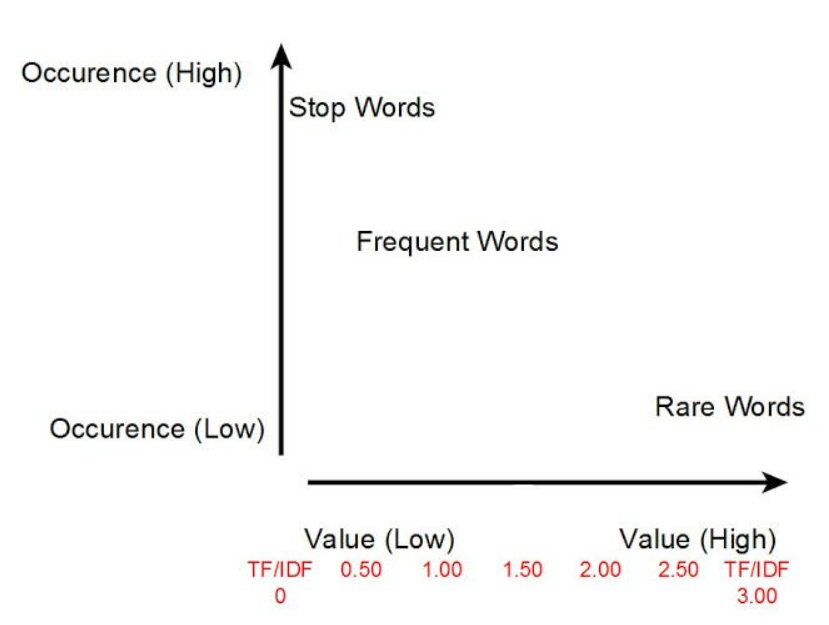

### 3. Neural network- based Embedding

<pre>
Sử dụng dense vector : 
Thay vì chỉ đơn thuần sử dụng mã hõa nhị phân
thay vào đó chúng ta sẽ học trực tiếp từ dữ liệu sau đó embbed nó  
ý tưởng tương tự với mạng neural
</pre>

<pre>
Để dễ hiểu chúng ta sẽ hiểu đơn gian là nhúng các từ vào một hình học đại số ko gian nhiều chiều .
Vị trí của các từ trong không gian , khoảng cách giữa các từ sẽ liên quan đến nghĩa của nó .. từ cùng nghĩa sẽ gần nhau hơn 
Quá trình này cần phải học 
</pre>

#### Word2vec


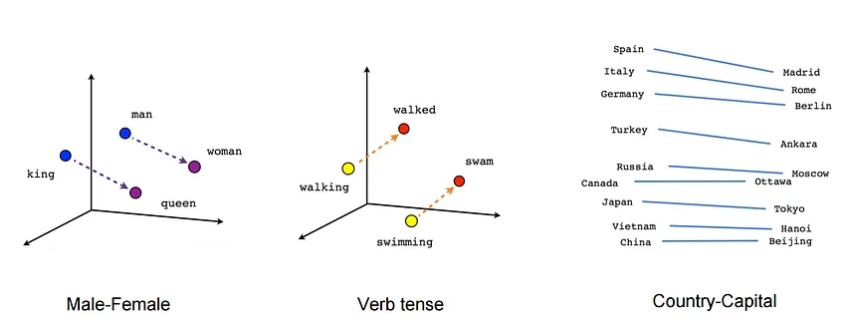

In [2]:
import gensim
import pandas as pd 

In [ ]:
###!curl https://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz

In [8]:
data = pd.read_json("Cell_Phones_and_Accessories_5.json",lines=True)
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"
...,...,...,...,...,...,...,...,...,...
194434,A1YMNTFLNDYQ1F,B00LORXVUE,eyeused2loveher,"[0, 0]",Works great just like my original one. I reall...,5,This works just perfect!,1405900800,"07 21, 2014"
194435,A15TX8B2L8B20S,B00LORXVUE,Jon Davidson,"[0, 0]",Great product. Great packaging. High quality a...,5,Great replacement cable. Apple certified,1405900800,"07 21, 2014"
194436,A3JI7QRZO1QG8X,B00LORXVUE,Joyce M. Davidson,"[0, 0]","This is a great cable, just as good as the mor...",5,Real quality,1405900800,"07 21, 2014"
194437,A1NHB2VC68YQNM,B00LORXVUE,Nurse Farrugia,"[0, 0]",I really like it becasue it works well with my...,5,I really like it becasue it works well with my...,1405814400,"07 20, 2014"


In [11]:
data['reviewText'].head(5)

0    They look good and stick good! I just don't li...
1    These stickers work like the review says they ...
2    These are awesome and make my phone look so st...
3    Item arrived in great time and was in perfect ...
4    awesome! stays on, and looks great. can be use...
Name: reviewText, dtype: object

In [13]:
reviewText = data['reviewText'].apply(gensim.utils.simple_preprocess)
reviewText

0         [they, look, good, and, stick, good, just, don...
1         [these, stickers, work, like, the, review, say...
2         [these, are, awesome, and, make, my, phone, lo...
3         [item, arrived, in, great, time, and, was, in,...
4         [awesome, stays, on, and, looks, great, can, b...
                                ...                        
194434    [works, great, just, like, my, original, one, ...
194435    [great, product, great, packaging, high, quali...
194436    [this, is, great, cable, just, as, good, as, t...
194437    [really, like, it, becasue, it, works, well, w...
194438    [product, as, described, have, wasted, lot, of...
Name: reviewText, Length: 194439, dtype: object

In [14]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

In [15]:
model.build_vocab(reviewText,progress_per=1000)

In [16]:
model.train(reviewText,total_examples=model.corpus_count,epochs = model.epochs)

(61505418, 83868975)

In [17]:
model.wv.most_similar("good")

[('decent', 0.8281508684158325),
 ('great', 0.7797182202339172),
 ('nice', 0.6931678056716919),
 ('fantastic', 0.6922242641448975),
 ('superb', 0.6331956386566162),
 ('excellent', 0.6321709752082825),
 ('awesome', 0.599210798740387),
 ('outstanding', 0.5976054668426514),
 ('reasonable', 0.5956236720085144),
 ('exceptional', 0.5915346145629883)]

In [19]:
model.wv.similarity("good","bad")

0.5774343

In [20]:
model.wv.get_vector("good")

array([ 0.6030495 , -1.6579798 ,  0.1652161 , -1.0252062 , -0.81052905,
        2.072928  ,  1.9459916 ,  1.2925216 , -0.49594545,  3.1888056 ,
        0.4829446 ,  2.7291832 ,  0.98391044, -0.5005893 ,  0.53009343,
        1.3126943 ,  0.54885674,  1.2606496 ,  4.1353908 , -0.3478505 ,
       -0.6007637 ,  2.661524  , -2.1663654 ,  0.6666095 ,  0.11106234,
        2.1763854 , -0.88402647,  1.7586169 , -1.9218024 , -1.2763885 ,
        0.5845198 ,  0.08754294,  5.8150706 , -1.4698712 ,  1.5256404 ,
       -3.8803217 ,  0.01518143, -1.442248  , -4.3712854 ,  1.075134  ,
       -4.186307  ,  1.6924583 ,  3.395027  ,  0.21248111, -0.33229294,
       -1.5920235 ,  1.3546957 , -1.3167415 , -3.3980823 ,  1.8527033 ,
        0.38739023, -0.42155325, -2.6877623 ,  1.2425841 ,  0.45430577,
        0.22107922, -1.375625  ,  1.8783484 , -1.8338214 , -3.1115606 ,
        0.0075098 , -0.7392279 ,  3.2868352 , -1.449072  ,  2.5984786 ,
        1.570136  , -2.8838458 , -4.7985926 , -0.44789442, -2.24

#### GloVe

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 


In [24]:
x = {'text','the','leader','prime','natural','language'}

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [29]:
print("Number of unique words in dictionary=", 
      len(tokenizer.word_index))
print("Dictionary is = ", tokenizer.word_index)

Number of unique words in dictionary= 6
Dictionary is =  {'text': 1, 'prime': 2, 'leader': 3, 'natural': 4, 'the': 5, 'language': 6}


In [ ]:
!curl http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
!unzip glove*.zip

In [37]:
def embedding_for_vocab(path,word_index,embedding_dim):
    vocab = len(word_index) + 1
    embedding_matrix_vocab = np.zeros((vocab,embedding_dim))
    with open(path,encoding='utf8') as f:
        for line in f:
            word,*vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(vector,dtype=np.float32)[:embedding_dim]
    return embedding_matrix_vocab 


In [38]:
embedding_matrix_vocab = embedding_for_vocab('glove.6B.50d.txt', tokenizer.word_index,50)
  

In [44]:
print("Dense vector for first word is => ",embedding_matrix_vocab[1])

Dense vector for first word is =>  [ 0.32615     0.36686    -0.0074905  -0.37553     0.66715002  0.21646
 -0.19801    -1.10010004 -0.42221001  0.10574    -0.31292     0.50953001
  0.55774999  0.12019     0.31441    -0.25042999 -1.06369996 -1.32130003
  0.87797999 -0.24627     0.27379    -0.51091999  0.49324     0.52243
  1.16359997 -0.75322998 -0.48052999 -0.11259    -0.54595    -0.83920997
  2.98250008 -1.19159997 -0.51958001 -0.39365    -0.1419     -0.026977
  0.66295999  0.16574    -1.1681      0.14443     1.63049996 -0.17216
 -0.17436001 -0.01049    -0.17794     0.93076003  1.0381      0.94265997
 -0.14805    -0.61109   ]
